In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# http://bogotobogo.com/python/scikit-learn/Artificial-Neural-Network-ANN-10-Deep-Learning-3-Theano-TensorFlow-Keras.php

In [3]:
import theano

In [4]:
# initialize
x1 = theano.tensor.scalar()
w1 = theano.tensor.scalar()
w0 = theano.tensor.scalar()
z1 = w1 * x1 + w0

# compile
net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

# execute
net_input(20.0, 10.0, 0.5)

array(200.5)

In [5]:
theano.config.floatX

'float64'

In [6]:
theano.config.device, theano.config.floatX

('cpu', 'float64')

In [7]:
import numpy as np

# initialize
# if running Theano on 32 bit mode, 
# use fmatrix instead of dmatrix
x = theano.tensor.dmatrix(name='x')
x_sum = theano.tensor.sum(x, axis=0)

# compile
calc_sum = theano.function(inputs=[x], outputs=x_sum)

# execute (Python list)
parray = [[1, 2, 3], [8, 9, 10]]
print('Column sum Python list:', calc_sum(parray))

# execute (NumPy array)
nparray = np.array([[1, 2, 3], [8, 9, 10]], dtype=theano.config.floatX)
print('Column sum NumPy array:', calc_sum(nparray))

('Column sum Python list:', array([  9.,  11.,  13.]))
('Column sum NumPy array:', array([  9.,  11.,  13.]))


In [8]:
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], 
                             dtype=theano.config.floatX))
update = [[w, w + 1.0]]
update

[[<TensorType(float64, matrix)>, Elemwise{add,no_inplace}.0]]

In [9]:
from theano import tensor as T

# initialize
x = T.dmatrix(name='x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], 
                             dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

# compile
net_input = theano.function(inputs=[x], updates=update, outputs=z)

# execute
data = np.array([[1, 2, 3]], dtype=theano.config.floatX)
for i in range(5):
    print('z%d:' % i, net_input(data))

('z0:', array([[ 0.]]))
('z1:', array([[ 6.]]))
('z2:', array([[ 12.]]))
('z3:', array([[ 18.]]))
('z4:', array([[ 24.]]))


In [10]:
# initialize
data = np.array([[1, 2, 3]], dtype=theano.config.floatX)
x = T.dmatrix(name='x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], 
                             dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

# compile
net_input = theano.function(inputs=[], 
                            updates=update, 
                            givens={x: data},
                            outputs=z)

# execute
for i in range(5):
    print('z:', net_input())

('z:', array([[ 0.]]))
('z:', array([[ 6.]]))
('z:', array([[ 12.]]))
('z:', array([[ 18.]]))
('z:', array([[ 24.]]))


In [11]:
# Linear Regression

In [12]:
# creating one-dimensional dataset
import numpy as np
X_train = np.asarray([[0.0], [1.0], [2.0], [3.0], [4.0],
                      [5.0], [6.0], [7.0], [8.0], [9.0]], 
                     dtype=theano.config.floatX)

y_train = np.asarray([1.0, 1.3, 3.1, 2.0, 5.0, 
                      6.3, 6.6, 7.4, 8.0, 9.0], 
                     dtype=theano.config.floatX)
X_train, y_train

(array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.]]),
 array([ 1. ,  1.3,  3.1,  2. ,  5. ,  6.3,  6.6,  7.4,  8. ,  9. ]))

In [13]:
import theano
from theano import tensor as T
import numpy as np

def train_linreg(X_train, y_train, eta, epochs):

    costs = []
    # Initialize arrays
    eta0 = T.dscalar('eta0')
    y = T.dvector(name='y') 
    X = T.dmatrix(name='X')   
    w = theano.shared(np.zeros(
                      shape=(X_train.shape[1] + 1),
                      dtype=theano.config.floatX),
                      name='w')
    
    # calculate cost
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2)) 

    # perform gradient update
    gradient = T.grad(cost, wrt=w)
    update = [(w, w - eta0 * gradient)]

    # compile model
    train = theano.function(inputs=[eta0],
                            outputs=cost,
                            updates=update,
                            givens={X: X_train,
                                    y: y_train})      
    
    for _ in range(epochs):
        costs.append(train(eta))
    
    return costs, w

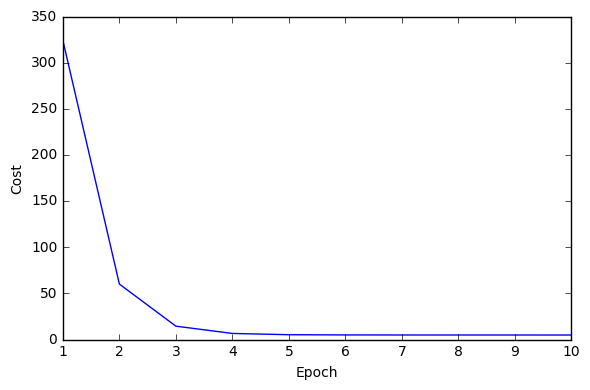

In [14]:
costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)
   
plot(range(1, len(costs)+1), costs)

tight_layout()
xlabel('Epoch')
ylabel('Cost')
tight_layout()
show()

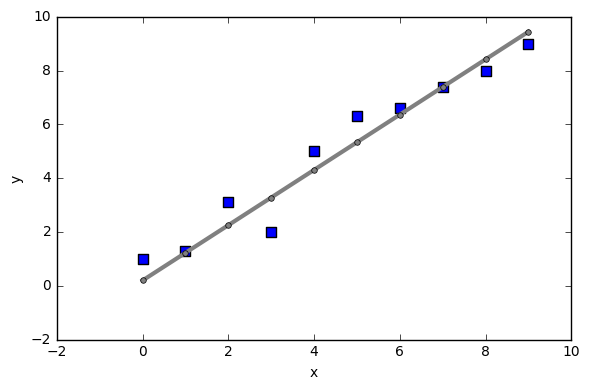

In [15]:
# prediction

def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], givens={w: w}, 
                              outputs=net_input)
    return predict(X)

scatter(X_train, y_train, marker='s', s=50)
plot(range(X_train.shape[0]), 
         predict_linreg(X_train, w), 
         color='gray', 
         marker='o', 
         markersize=4, 
         linewidth=3)

xlabel('x')
ylabel('y')

tight_layout()
show()

In [16]:
# Keras

In [34]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                        dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [35]:
X_train, y_train = load_mnist('mnist', kind='train')
X_train.shape[0], X_train.shape[1]

(60000, 784)

In [36]:
X_test, y_test = load_mnist('mnist', kind='t10k')
X_test.shape[0], X_test.shape[1]

(10000, 784)

In [37]:
# image in 64-bit format

import theano 

theano.config.floatX = 'float64'
X_train = X_train.astype(theano.config.floatX)
X_test = X_test.astype(theano.config.floatX)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [38]:
# one-hot encoding class labels

from keras.utils import np_utils

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [39]:
y_train_OneHotEncoding = np_utils.to_categorical(y_train) 
y_train_OneHotEncoding[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [40]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1) 

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=y_train_OneHotEncoding.shape[1], 
                init='uniform', 
                activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(X_train, y_train_OneHotEncoding, nb_epoch=50, 
          batch_size=300, verbose=1, 
          validation_split=0.1, show_accuracy=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 13s - loss: 2.2460 - val_loss: 2.1508
Epoch 2/50
54000/54000 [==============================] - 12s - loss: 1.9574 - val_loss: 1.6992
Epoch 3/50
54000/54000 [==============================] - 12s - loss: 1.4466 - val_loss: 1.1753
Epoch 4/50
54000/54000 [==============================] - 12s - loss: 1.0397 - val_loss: 0.8597
Epoch 5/50
54000/54000 [==============================] - 12s - loss: 0.8057 - val_loss: 0.6754
Epoch 6/50
54000/54000 [==============================] - 12s - loss: 0.6599 - val_loss: 0.5551
Epoch 7/50
54000/54000 [==============================] - 12s - loss: 0.5638 - val_loss: 0.4743
Epoch 8/50
54000/54000 [==============================] - 13s - loss: 0.4981 - val_loss: 0.4194
Epoch 9/50
54000/54000 [==============================] - 13s - loss: 0.4505 - val_loss: 0.3785
Epoch 10/50
54000/54000 [==============================] - 13s - loss: 0.4180 - val_los

In [47]:
y_train_pred = model.predict_classes(X_train, verbose=0)
y_train_pred[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9,
       8, 5, 3, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0,
       0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 8, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7,
       4, 6, 8, 0, 7, 8, 3, 1])

In [48]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9,
       8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0,
       0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7,
       4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [50]:
y_train.shape, y_train_pred.shape

((60000,), (60000,))

In [52]:
train_acc = np.sum(y_train == y_train_pred, axis=0, dtype='float') / X_train.shape[0]
train_acc*100

94.808333333333323